In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

Dataset

In [2]:
#x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
#y = np.array([15, 11, 2, 8, 25, 32])

In [25]:
x = np.linspace(-1,1,51) # x "data": [-1, -0.96, ..., 0.96, 1]
y = x**3 - x + np.random.randn(len(x)) # x^3 - x + N(0,1) "noise"


array([-0.38332186,  0.89303966, -0.22479673,  1.90989999, -1.44772634,
        0.711464  , -0.06575492,  0.31784634,  0.25972116, -0.42738851,
        2.66509604, -0.14711361,  0.9175051 ,  0.82432488,  2.38072162,
       -0.15074836,  1.33188288, -0.00868527, -1.12802687,  1.40791201,
       -0.15135619,  0.71270899,  0.25873024,  1.03016973, -1.33825488,
        0.82887153, -0.28186878, -0.13458394, -0.7366819 ,  0.55685291,
       -1.85458918,  1.47554078,  0.65223811,  0.28771261, -0.03028102,
       -1.08343372, -1.33005882, -0.90988454,  0.18069439, -1.68072192,
        0.44239159, -0.79288593, -1.1026025 ,  0.29118737,  0.04291702,
       -0.32002477, -1.00530213,  0.43322952, -0.2981793 , -1.51931084,
       -0.08803497])

In [6]:
transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer

PolynomialFeatures(include_bias=False)

In [7]:
transformer.fit(x)

PolynomialFeatures(include_bias=False)

In [9]:
x_ = transformer.transform(x)
x_

array([[   5.,   25.],
       [  15.,  225.],
       [  25.,  625.],
       [  35., 1225.],
       [  45., 2025.],
       [  55., 3025.]])

In [34]:
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)
x_

ValueError: Expected 2D array, got 1D array instead:
array=[-1.   -0.96 -0.92 -0.88 -0.84 -0.8  -0.76 -0.72 -0.68 -0.64 -0.6  -0.56
 -0.52 -0.48 -0.44 -0.4  -0.36 -0.32 -0.28 -0.24 -0.2  -0.16 -0.12 -0.08
 -0.04  0.    0.04  0.08  0.12  0.16  0.2   0.24  0.28  0.32  0.36  0.4
  0.44  0.48  0.52  0.56  0.6   0.64  0.68  0.72  0.76  0.8   0.84  0.88
  0.92  0.96  1.  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Create a model and fit it

In [13]:
model = LinearRegression().fit(x_, y)
model

LinearRegression()

In [14]:
r_sq = model.score(x_, y)
print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)

print('coefficients:', model.coef_)

coefficient of determination: 0.8908516262498564
intercept: 21.372321428571425
coefficients: [-1.32357143  0.02839286]


In [16]:
x_ = PolynomialFeatures(degree=2, include_bias=True).fit_transform(x)
x_

array([[1.000e+00, 5.000e+00, 2.500e+01],
       [1.000e+00, 1.500e+01, 2.250e+02],
       [1.000e+00, 2.500e+01, 6.250e+02],
       [1.000e+00, 3.500e+01, 1.225e+03],
       [1.000e+00, 4.500e+01, 2.025e+03],
       [1.000e+00, 5.500e+01, 3.025e+03]])

In [18]:
model = LinearRegression(fit_intercept=False).fit(x_, y)
model

LinearRegression(fit_intercept=False)

In [19]:
r_sq = model.score(x_, y)
print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)

print('coefficients:', model.coef_)

coefficient of determination: 0.8908516262498565
intercept: 0.0
coefficients: [21.37232143 -1.32357143  0.02839286]


Predict response

In [33]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')

ValueError: Expected 2D array, got 1D array instead:
array=[-1.   -0.96 -0.92 -0.88 -0.84 -0.8  -0.76 -0.72 -0.68 -0.64 -0.6  -0.56
 -0.52 -0.48 -0.44 -0.4  -0.36 -0.32 -0.28 -0.24 -0.2  -0.16 -0.12 -0.08
 -0.04  0.    0.04  0.08  0.12  0.16  0.2   0.24  0.28  0.32  0.36  0.4
  0.44  0.48  0.52  0.56  0.6   0.64  0.68  0.72  0.76  0.8   0.84  0.88
  0.92  0.96  1.  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [41]:
from numpy.polynomial import polynomial as p
m,c=p.polyfit(x,y,3,full=True)


<ipython-input-51-115a794a3310>:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(x,np.log(x))
<ipython-input-51-115a794a3310>:4: RuntimeWarning: invalid value encountered in log
  plt.plot(x,np.log(x))


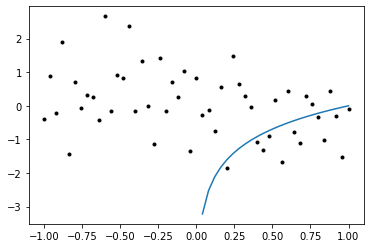

In [51]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'k.',label="ScatterPlot")
#fit = np.poly1d(coefficients) 

#plt.plot(x,m*x +c, 'r-',label="Regression")